Information about the data:
    
    -> The dataset was taken from PIMA Indian Diabetes Database
    
    -> This dataset is also available in the Kaggle
    
    -> The dataset consists of the following features:
        
        Pregnancies : Number of times pregnant
            
        Glucose     : Plasma glucose concentration over 2 hours in  an oral glucose torelance test
            
        Blood Pressure : Diastolic blood pressure
            
        Skin Thickness : Triceps skin fold thickness
            
        Insulin        : 2 hours serum insulin
            
        BMI            : Body Mass Index
            
        Diabetes Pedigree Function : Likelihood of diabates based on family history
            
        Age             : Age of the patient
            
        Outcome(Class label) : Class variable
            
                                     : 0 IF NON-DIABETIC
                                  
                                     : 1 IF DIABETIC

OBJECTIVE:
    
    USING MACHINE LEARNING ANALYSIS AND MODEL TO PREDICT WHETHER A PERSON HAS DIABETES OR NOT

Importing the required libraries:
    
    Numpy : To convert data into suitable format to feed the classification model
        
    Pandas : To read data from CSV file and to store the data in form of Dataframe for further computations
    
    Seaborn and Matplotlib for visualizations
    
    Sklearn : To import the model and joblib to save the model

In [4]:
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

-> The shape of data is 768 data points with 9 features each

-> The number of features/columns for each data point are 9

In [9]:
data = pd.read_csv("diabetes.csv")
print(data.shape)
print(data.columns)
print(data.ndim)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
2


Sample Data

In [12]:
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Data Pre-Processing and Cleaning:
    
    -> Mean imputation for the null values
    
    -> Removing outliers
    
    -> Checking the Correlation between the features

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

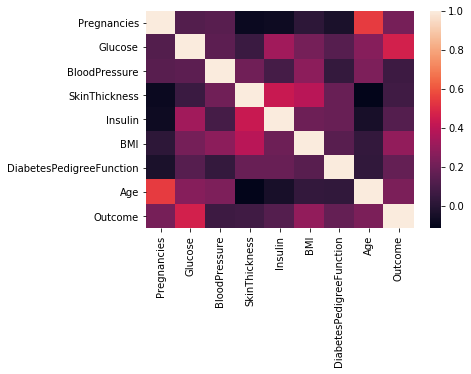

In [16]:
corr = data.corr()
print(corr)
s.heatmap(corr, xticklabels=corr.columns, yticklabels= corr.columns)

Observation : 
    
    -> The brighter colors indicates more correlation between the features
    
    -> From the table and heatmap, Glucose levels, BMI, Age, Pregnancies have more correlation with the outcome

-> Splitting the dataset to Train, Test, cross check

-> Seperating the class labels from the data

-> Normalizing the data

In [123]:
traindata = data[150:]
testdata = data[18:150]
checkdata = data[0:18]
print(traindata.shape)
print(testdata.shape)
print(checkdata.shape)

(618, 9)
(132, 9)
(18, 9)


In [124]:
train_label = np.asarray(traindata['Outcome'])
train_data = traindata.drop('Outcome', 1)
test_label = np.asarray(testdata['Outcome'])
test_data = testdata.drop('Outcome',1)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(618, 8)
(618,)
(132, 8)
(132,)


In [125]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)

train_data = (train_data - mean)/std

test_data = (test_data - mean)/std
print(mean)

Pregnancies                   3.784790
Glucose                     121.736246
BloodPressure                69.199029
SkinThickness                20.771845
Insulin                      81.527508
BMI                          32.161327
DiabetesPedigreeFunction      0.475333
Age                          33.174757
dtype: float64


TRAINING AND EVALUATING MACHINE LEARNING MODEL

In [126]:
model = LogisticRegression()
print(model)
model.fit(train_data, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
accuracy = model.score(test_data, test_label)
accuracy = accuracy*100
print(accuracy)

80.3030303030303


MODEL INTERPRETATION:
    
    To check how different features have greater impact on the model

[0.49342213322606715, 1.1564127300424993, -0.2691681507254062, 0.010539700806471045, -0.18173978760864634, 0.6729906109892765, 0.3529344626930496, 0.0832145914265438]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
8
8
                   Features   Weights
0               Pregnancies  0.493422
1                   Glucose  1.156413
2             BloodPressure -0.269168
3             SkinThickness  0.010540
4                   Insulin -0.181740
5                       BMI  0.672991
6  DiabetesPedigreeFunction  0.352934
7                       Age  0.083215


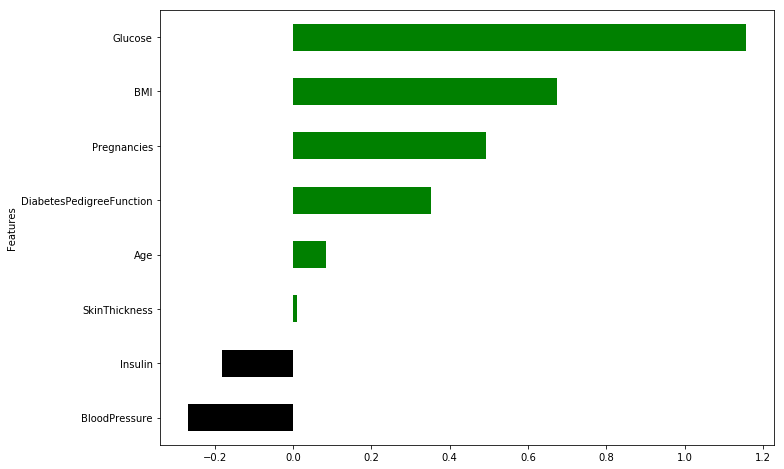

In [128]:
coef = list(model.coef_[0])
print(coef)
label = train_data.columns
print(labels)
features = pd.DataFrame()
print(len(coef))
print(len(label))
features['Features'] = label
features['Weights'] = coef
print(features)
features.sort_values(by=['Weights'], ascending= True, inplace=True)
features['positive'] = features['Weights'] > 0
features.set_index("Features", inplace=True)
features.Weights.plot(kind='barh', figsize=(11,8))
features.Weights.plot(kind = 'barh', figsize=(11,8), color = features.positive.map({True:'green', False:'black'}))


Observation:
    
    -> From the above plot:
        
        -> Glucose level, BMI, Pregnancies, DiabetesPedigreeFunction have more impact on the model
        
        -> Insulin and Blood pressure have negative influence of preiction on the model
        

SAVING THE MODEL:

In [129]:
joblib.dump([model, mean, std], "diabetes_model")

['diabetes_model']

Obseravtion:
    
    To check our model is saved properly or not, we have test the accuracy of the model on the test data which we have done 
    
    it previously and if there is no change in the accuracy then we saved our model perfectly

In [130]:
loaded_model, means, stds = joblib.load('diabetes_model')
score = loaded_model.score(test_data, test_label)
acc = score*100
print("The accuracy before saving the model is : 80.30303030303")
print("The accuracy after saving the model is :", acc)

The accuracy before saving the model is : 80.30303030303
The accuracy after saving the model is : 80.3030303030303


MODEL PREDIICTION:
    
    We have used the test data for accuracy check and also we have the Unseen data. We have the unseed data in the checkdata

In [141]:
checkdata.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [173]:
sample_data = checkdata[17:]
sample_data_features = np.asarray(sample_data.drop('Outcome',1))
sample_data_features = (sample_data_features-means)/stds
print(sample_data_features)
prediction = loaded_model.predict(sample_data_features)
print(prediction)

[[  7.    107.     74.      0.      0.     29.6     0.254  31.   ]]
[1]


Observation:
    
    The model has predicted the outcome as 1, which means that the person has diabetes.

CONCLUSION:
    
    This is the end to end data science example. Cleaning of data, pre-processing, Imputation of missing values,
    
    Handling categorical values, dividing the data, selecting and training the model, accuracy check on the model,
    
    saving the model, loading the model and checking accuracy with unseen data on model. This models accuracy can 
    
    be improved with the help of domain knowledge.